# Machine Learning Exercise 2, Part 2

This notebook covers regularlized logistic regression and gradient descent.

In [1]:
import numpy
import math
from matplotlib import pyplot as plt
from scipy.special import expit as sigmoid
%matplotlib inline

As usual, need to read in the data from the files:

In [2]:
from numpy import genfromtxt
def load(f):
    '''Parse the data from the input file and store in pandas dataframs'''
    # Verify the file exist:
    try:
        _file = open(f, "r")
    except:
        print "ERROR: requested file {} does not exist or could not be opened."

    # For this exercise, both files are csv format:
    data = numpy.genfromtxt(f,delimiter=',')
    return data.T

Load the data from the file:

In [3]:
x1,x2,y = load("ex2/ex2data2.txt")

We want to make a scatter plot of the data, but the marker used needs to be based on the value of y.  Here's a way to do that:

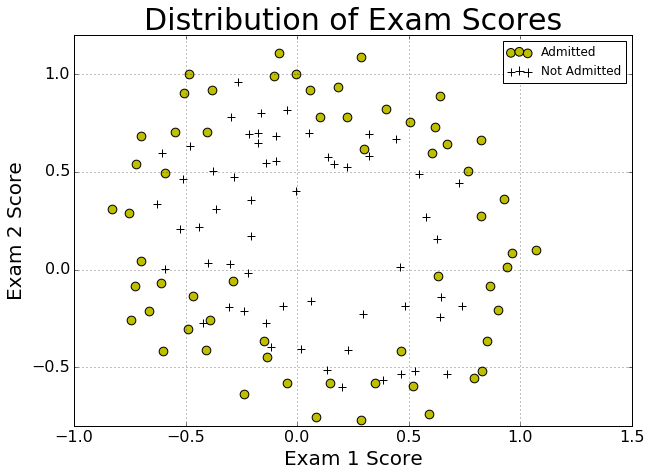

In [4]:

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['Admitted', 'Not Admitted']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# Plots require a title and axis labels:
plt.title("Distribution of Exam Scores", fontsize=30)
plt.xlabel("Exam 1 Score", fontsize=20)
plt.ylabel("Exam 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
ax.set_xlim([-1, 1.5])
ax.set_ylim([-0.8, 1.2])

# Need a legend, of course:
plt.legend()

plt.grid(True)

We need to map the features onto a bigger set of combinations of x1 and x2:

In [5]:
def mapFeatures(x1,x2):
    # This function maps the two input variables into a longer feature map
    # It has every combination, up to the Nth power (here, set to 6, but generalizeable)
    N = 6
    n_elements = (N+1)*(N+2)/2
    count = 0
    output = numpy.zeros(n_elements)
    for i in xrange(0,N+1):
        for j in xrange(0,N+1 - i):
            output[count] = x1**i * x2**(j)
#             print "{} ({},{}): {}".format(count, i, (j), output[count])
            count += 1
    return output
    

In [6]:
mapFeatures(2,0.5)

array([  1.00000000e+00,   5.00000000e-01,   2.50000000e-01,
         1.25000000e-01,   6.25000000e-02,   3.12500000e-02,
         1.56250000e-02,   2.00000000e+00,   1.00000000e+00,
         5.00000000e-01,   2.50000000e-01,   1.25000000e-01,
         6.25000000e-02,   4.00000000e+00,   2.00000000e+00,
         1.00000000e+00,   5.00000000e-01,   2.50000000e-01,
         8.00000000e+00,   4.00000000e+00,   2.00000000e+00,
         1.00000000e+00,   1.60000000e+01,   8.00000000e+00,
         4.00000000e+00,   3.20000000e+01,   1.60000000e+01,
         6.40000000e+01])

Define the cost function:

In [7]:
def h(_theta, _x):
    return sigmoid(numpy.dot(_theta,_x))

def cost(_theta, _x, _y, _l):
    val = (1.0/len(_y)) * (-numpy.dot(y.T, numpy.log(h(_theta,_x))) 
                        - numpy.dot((1-y).T, numpy.log(1 - h(_theta,_x)))
                        + (_l / 2)* numpy.dot(_theta,_theta) )
    return val.flatten()


Define the vector x to use in the functions:

In [8]:
temp = mapFeatures(x1[0],x2[0])
x = numpy.ndarray((len(x1),len(temp)))
for i, _x1, _x2 in zip(xrange(len(x1)), x1, x2):
    x[i] = mapFeatures(_x1,_x2)
x = x.T
print x.shape


(28, 118)


In [9]:
theta = numpy.zeros(x.shape[0])
h(theta,x)

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])

That looks good so far.

Also, let's check the cost function works properly:

In [10]:
print cost(theta,x,y,0)

[ 0.69314718]


We also need a function to compute the gradient at each step:

In [11]:
def gradient(_theta,_x,_y,_l):
    grad = (1.0/len(_y)) * numpy.dot((h(_theta,_x) - y),_x.T) + (_l/len(_y)*_theta)
    # This is lazy, but I use the vectorized version and fix the first element:
    grad[0] = (1.0/len(_y)) * numpy.dot((h(_theta,_x) - y),_x.T)[0]
    return grad


In [12]:
print "Initial gradient: ", gradient(theta,x,y,1)

Initial gradient:  [  8.47457627e-03   7.77711864e-05   3.76648474e-02   2.34764889e-02
   3.93028171e-02   3.10079849e-02   3.87936363e-02   1.87880932e-02
   1.15013308e-02   8.19244468e-03   3.09593720e-03   4.47629067e-03
   1.37646175e-03   5.03446395e-02   7.32393391e-03   1.28600503e-02
   5.83822078e-03   7.26504316e-03   1.83559872e-02   2.23923907e-03
   3.38643902e-03   4.08503006e-04   3.93486234e-02   4.32983232e-03
   6.31570797e-03   1.99707467e-02   1.09740238e-03   3.10312442e-02]


Similar to the octave implementation, we will use a built in function to do the gradient descent.  In this case, we'll use scipy.optimize.fmin_bfgs:
http://docs.scipy.org/doc/scipy/reference/optimize.html

In [13]:
from scipy.optimize import minimize

In [14]:
def min_func(_theta, _x, _y,_l):
    return cost(_theta,_x,_y,_l), gradient(_theta,_x,_y,_l)

In [15]:
l = 1.0
params = minimize(min_func,theta,jac=True,args=(x,y,l),method="NEWTON-CG")
print params

     fun: 0.5358664731703311
     jac: array([  3.08739070e-06,   2.02630928e-06,   1.88612495e-06,
         3.72382741e-07,   1.29937479e-07,  -6.11727309e-07,
        -6.69086505e-07,   1.26852286e-06,   4.64839912e-06,
         2.17724203e-06,   2.09747171e-06,   1.53501768e-06,
         1.18980655e-06,   1.32394139e-06,   2.01427139e-06,
        -1.67451120e-07,   4.62298814e-07,  -4.28224989e-08,
        -4.80991729e-07,   1.17801633e-06,   6.44109856e-10,
         3.13384257e-07,  -6.42559378e-07,   1.15853181e-06,
        -1.69961965e-07,  -8.23318113e-07,   5.54522821e-07,
        -9.34691939e-07])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 23
    nhev: 0
     nit: 4
    njev: 67
  status: 2
 success: False
       x: array([ 1.27273059,  1.18109013, -1.43155021, -0.17514396, -1.19281758,
       -0.45642072, -0.92470804,  0.62527775, -0.91721313, -0.35713496,
       -0.27461431, -0.29529632, -0.14383841, -2.0198528 , -0.36541134,
       -

In [16]:
opt_theta = params.x
print "Cost at optimized values is {}".format(cost(opt_theta,x,y,1.0))

Cost at optimized values is [ 0.53586647]


In [17]:
def predict(x1,x2):
    return h(opt_theta,mapFeatures(x1,x2))

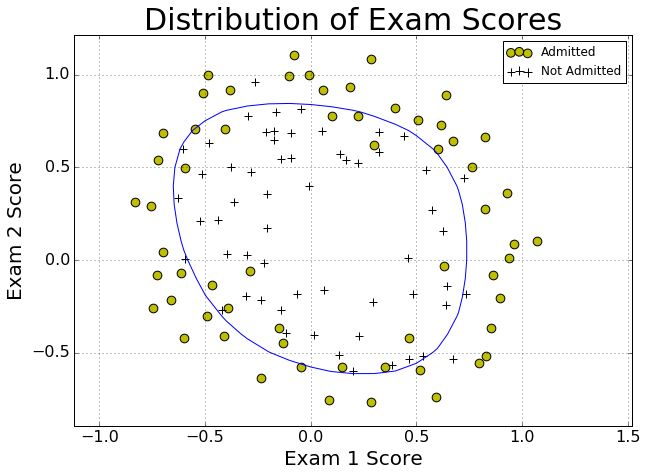

In [18]:

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['Admitted', 'Not Admitted']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# The way to make a decision boundary plot work well is to draw it as a contour plot.
# Create a list of exam values to sample over
exam0_vals = numpy.arange(-1,1.5,0.1)
exam1_vals = numpy.arange(-0.8,1.2,0.1)
j_vals = numpy.zeros((len(exam1_vals),len(exam0_vals)))

for i in xrange(len(exam0_vals)):
    for j in xrange(len(exam1_vals)):
        j_vals[j][i] = predict(exam0_vals[i],exam1_vals[j])

# print j_vals
        
# Make the contour plot of the cost function:
contours = plt.contour(exam0_vals,exam1_vals,j_vals,
                       levels=[0.5],
                       colors=['b'],
                       label="Cost Function")
# plt.clabel(contours, inline=1, fmt='%1.1f',fontsize=10)
        
# The method used above is slower, but also generalized for complicated contours
        
# Plots require a title and axis labels:
plt.title("Distribution of Exam Scores", fontsize=30)
plt.xlabel("Exam 1 Score", fontsize=20)
plt.ylabel("Exam 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
# ax.set_xlim([30, 100])
# ax.set_ylim([30, 100])

# Need a legend, of course:
plt.legend()

plt.grid(True)

Looks decent enough.

Try again with no regularization.  The scipy algorithms don't really behave that well here, so just implement the gradient descent by hand:

In [37]:
theta

array([ 4.12893113,  5.11043678, -7.43370508, -2.73457224, -5.67673094,
        2.61730647,  0.65557705,  2.23891522, -7.29805835,  2.57817533,
       -2.75664342, -3.72960855, -3.63626856, -5.69252157, -0.58402736,
       -3.83425629, -3.80705729, -4.01704491,  2.2243478 ,  3.55339728,
        4.82099938,  2.71173786, -4.71863245, -0.44382858, -1.01046007,
       -1.65130312,  1.44139707, -5.64120362])

In [36]:
theta

array([ 4.12893113,  5.11043678, -7.43370508, -2.73457224, -5.67673094,
        2.61730647,  0.65557705,  2.23891522, -7.29805835,  2.57817533,
       -2.75664342, -3.72960855, -3.63626856, -5.69252157, -0.58402736,
       -3.83425629, -3.80705729, -4.01704491,  2.2243478 ,  3.55339728,
        4.82099938,  2.71173786, -4.71863245, -0.44382858, -1.01046007,
       -1.65130312,  1.44139707, -5.64120362])

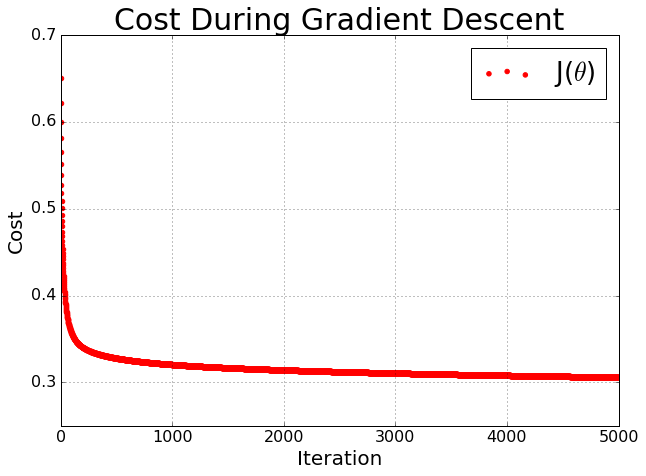

In [51]:
iterations = 5000
alpha = 5
l = 0.0

# start_cost = cost()

overfit_theta = numpy.zeros(x.shape[0])
cost_history = []

for i in xrange(iterations):
    # Update the theta parameters:
    grad = gradient(overfit_theta,x,y,l)
    overfit_theta -= alpha*grad
    cost_history.append(cost(overfit_theta,x,y,l))

def plotCost(x,y):
    
    #Define the plot
    fig, ax = plt.subplots(figsize=(10,7))
    
    #Plot the data
    # Notice that I have to use a raw string (with the r in front) to render the theta correctly
    plt.scatter(x,y,marker="o",color='r',label=r"J($\theta$)")
    

    # Plots require a title and axis labels:
    plt.title("Cost During Gradient Descent", fontsize=30)
    plt.xlabel("Iteration", fontsize=20)
    plt.ylabel("Cost", fontsize=20)

    # Make the ticks bigger to be more visible:
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    
    # Set the plot limits
    ax.set_xlim(0,iterations)

    # Always, plt.grid(True)
    plt.grid(True)
    plt.legend(fontsize=26)

it = range(iterations)
plotCost(it,cost_history)

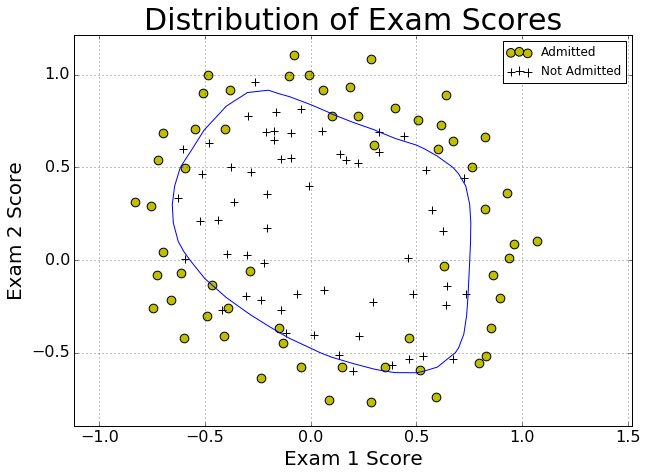

In [52]:
def predict_overfit(x1,x2):
    return h(overfit_theta,mapFeatures(x1,x2))

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['Admitted', 'Not Admitted']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# The way to make a decision boundary plot work well is to draw it as a contour plot.
# Create a list of exam values to sample over
exam0_vals = numpy.arange(-1,1.5,0.1)
exam1_vals = numpy.arange(-0.8,1.2,0.1)
j_vals = numpy.zeros((len(exam1_vals),len(exam0_vals)))

for i in xrange(len(exam0_vals)):
    for j in xrange(len(exam1_vals)):
        j_vals[j][i] = predict_overfit(exam0_vals[i],exam1_vals[j])

# print j_vals
        
# Make the contour plot of the cost function:
contours = plt.contour(exam0_vals,exam1_vals,j_vals,
                       levels=[0.5],
                       colors=['b'],
                       label="Cost Function")
# plt.clabel(contours, inline=1, fmt='%1.1f',fontsize=10)
        
# The method used above is slower, but also generalized for complicated contours
        
# Plots require a title and axis labels:
plt.title("Distribution of Exam Scores", fontsize=30)
plt.xlabel("Exam 1 Score", fontsize=20)
plt.ylabel("Exam 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
# ax.set_xlim([30, 100])
# ax.set_ylim([30, 100])

# Need a legend, of course:
plt.legend()

plt.grid(True)

Lastly, do it with too much regularization.  Honestly, doing gradient descent here is overkill.  Don't bother.  Just run the minimization routine out of the box.

In [22]:
l = 100
params_underfit = minimize(cost,theta,args=(x,y,l))
print params_underfit

      fun: 0.6865272791512609
 hess_inv: array([[  9.20527459e-01,  -1.82097760e-02,  -5.49204492e-02,
         -3.03598477e-02,  -4.43563564e-02,  -3.23435608e-02,
         -3.88757844e-02,  -5.74383260e-03,  -8.48104636e-03,
         -6.27072273e-03,  -1.79840722e-03,  -3.48952046e-03,
         -5.17600889e-04,  -5.38633210e-02,  -9.62763765e-03,
         -1.43021694e-02,  -6.66421949e-03,  -7.68494891e-03,
         -1.03454558e-02,  -1.14816850e-03,  -2.49907229e-03,
         -5.80413475e-05,  -3.55709744e-02,  -4.74051672e-03,
         -6.37764584e-03,  -1.30664925e-02,  -4.26448388e-04,
         -2.56162007e-02],
       [ -1.82097760e-02,   1.00898672e+00,  -2.87433838e-02,
         -8.60092576e-03,  -2.33282948e-02,  -1.20701480e-02,
         -1.87334428e-02,   1.22441421e-02,  -1.05842340e-02,
         -4.71818738e-03,  -2.61574634e-03,  -3.44376597e-03,
         -9.77314725e-04,  -3.57921463e-02,  -6.64165146e-03,
         -1.06957711e-02,  -4.77896515e-03,  -5.61504084e-03,
  

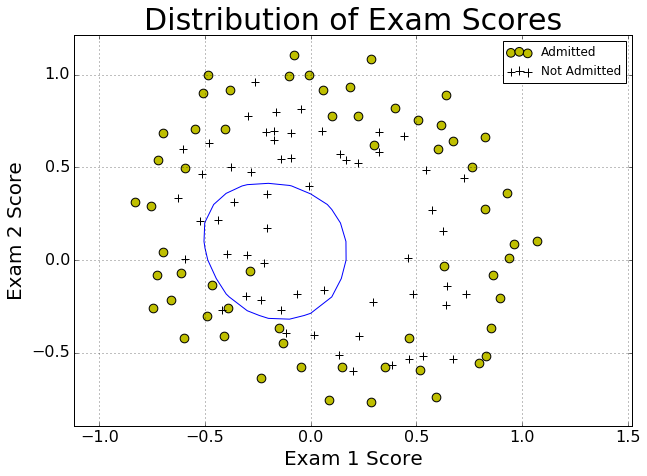

In [23]:
def predict_underfit(x1,x2):
    return h(params_underfit.x,mapFeatures(x1,x2))

# Set up the plots
fig, ax = plt.subplots(figsize=(10, 7))

# Go through the data and separate all of the types of answers:
unique_vals = set(y)

# Since I know there are two values, I can define the markers by hand:
markers = ["o","+"]
colors = ['y','black']
labels =['Admitted', 'Not Admitted']

# Here's the cool part: numpy can distribute the comparison operator to the whole array:
i = 0
for val in unique_vals:
    mask = (y == val )
    

    # Make a scatter plot
    ax.scatter(
        x1[mask], x2[mask], c=colors[i], marker=markers[i],label=labels[i],s=75)

    i += 1
    
# The way to make a decision boundary plot work well is to draw it as a contour plot.
# Create a list of exam values to sample over
exam0_vals = numpy.arange(-1,1.5,0.1)
exam1_vals = numpy.arange(-0.8,1.2,0.1)
j_vals = numpy.zeros((len(exam1_vals),len(exam0_vals)))

for i in xrange(len(exam0_vals)):
    for j in xrange(len(exam1_vals)):
        j_vals[j][i] = predict_underfit(exam0_vals[i],exam1_vals[j])

# print j_vals
        
# Make the contour plot of the cost function:
contours = plt.contour(exam0_vals,exam1_vals,j_vals,
                       levels=[0.5],
                       colors=['b'],
                       label="Cost Function")
# plt.clabel(contours, inline=1, fmt='%1.1f',fontsize=10)
        
# The method used above is slower, but also generalized for complicated contours
        
# Plots require a title and axis labels:
plt.title("Distribution of Exam Scores", fontsize=30)
plt.xlabel("Exam 1 Score", fontsize=20)
plt.ylabel("Exam 2 Score", fontsize=20)

# Make the ticks bigger to be more visible:
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

# Let's set the axis ranges a little more realistically:
# ax.set_xlim([30, 100])
# ax.set_ylim([30, 100])

# Need a legend, of course:
plt.legend()

plt.grid(True)